# Econometria
---

## Dataset

In [86]:
library(dplyr)
library(ggplot2)
library(gplots)

In [212]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


## Quantidade de linhas e colunas e tipo das variáveis

In [15]:
dim(data)
str(data)

[1] 548127    137

'data.frame':	548127 obs. of  137 variables:
 $ NU_ANO            : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ CO_IES            : int  1356 1356 1356 1356 1356 1356 1356 1356 1356 1356 ...
 $ CO_CATEGAD        : int  10003 10003 10003 10003 10003 10003 10003 10003 10003 10003 ...
 $ CO_ORGACAD        : int  10020 10020 10020 10020 10020 10020 10020 10020 10020 10020 ...
 $ CO_GRUPO          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ CO_CURSO          : int  47116 47116 47116 47116 47116 47116 47116 47116 47116 47116 ...
 $ CO_MODALIDADE     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ CO_MUNIC_CURSO    : int  3546603 3546603 3546603 3546603 3546603 3546603 3546603 3546603 3546603 3546603 ...
 $ CO_UF_CURSO       : int  35 35 35 35 35 35 35 35 35 35 ...
 $ CO_REGIAO_CURSO   : int  3 3 3 3 3 3 3 3 3 3 ...
 $ NU_IDADE          : int  22 49 23 25 22 22 22 22 25 21 ...
 $ TP_SEXO           : Factor w/ 2 levels "F","M": 2 1 2 2 1 2 2 1 2 1 ...
 $ ANO_FIM_EM        : int  2013 1988 2013 2011 

## Isolando de Ciências Econômicas
### Caminho:
> Ciências Econômicas(cód.:13)

In [222]:
#df = data[data$CO_IES == 571 & data$CO_GRUPO == 13,]
df = data[data$CO_GRUPO == 13,]
head(df)
dim(df)


,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
177710,2018,571,10002,10028,13,12571,1,4106902,41,4,...,5,3,5,5,5,6,NA,4,4,4
177711,2018,571,10002,10028,13,12571,1,4106902,41,4,...,1,1,1,1,1,1,1,1,1,1
177712,2018,571,10002,10028,13,12571,1,4106902,41,4,...,1,1,1,1,1,1,1,1,1,1
177713,2018,571,10002,10028,13,12571,1,4106902,41,4,...,NA,5,4,6,6,5,1,6,1,5
177714,2018,571,10002,10028,13,12571,1,4106902,41,4,...,1,1,1,1,1,1,1,1,1,1
177715,2018,571,10002,10028,13,12571,1,4106902,41,4,...,1,1,1,1,1,1,1,1,1,1


[1] 114 137

In [223]:
df$CO_TURNO_GRADUACAO = as.factor(df$CO_TURNO_GRADUACAO)

In [224]:
colnames(df)[15] = 'turno'
colnames(df)[45] = 'nota_geral'
summary(df$turno)
summary(df$nota_geral)

1  4 
38 76

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   30.90   38.80   38.81   49.50   72.80      17 

In [225]:
df = select(df, turno, nota_geral)
dim(df)

[1] 114   2

In [226]:
df = filter(df, turno==1 | turno==4)
dim(df)

[1] 114   2

# Valores missing

In [227]:
sapply(df, function(x) sum(is.na(x)))


turno nota_geral 
         0         17

# Excluindo valores missing

In [228]:
df = na.omit(df)

In [229]:
sapply(df, function(x) sum(is.na(x)))
dim(df)

turno nota_geral 
         0          0

[1] 97  2

In [230]:
head(df)
summary(df)

turno,nota_geral
1,38.8
1,59.5
1,49.5
1,21.3
1,55.8
1,55.6


 turno    nota_geral   
 1:37   Min.   : 0.00  
 4:60   1st Qu.:30.90  
        Median :38.80  
        Mean   :38.81  
        3rd Qu.:49.50  
        Max.   :72.80  

In [231]:
df$turno = factor(df$turno)

In [232]:
summary(df)

 turno    nota_geral   
 1:37   Min.   : 0.00  
 4:60   1st Qu.:30.90  
        Median :38.80  
        Mean   :38.81  
        3rd Qu.:49.50  
        Max.   :72.80  

In [233]:
levels(df$turno) = c('matutino', 'noturno')

In [234]:
summary(df)

      turno      nota_geral   
 matutino:37   Min.   : 0.00  
 noturno :60   1st Qu.:30.90  
               Median :38.80  
               Mean   :38.81  
               3rd Qu.:49.50  
               Max.   :72.80  

In [235]:
df <- df %>% mutate(id = row_number())

In [236]:
df <- df[c("id", "turno", "nota_geral")]

In [237]:
head(df)

id,turno,nota_geral
1,matutino,38.8
2,matutino,59.5
3,matutino,49.5
4,matutino,21.3
5,matutino,55.8
6,matutino,55.6


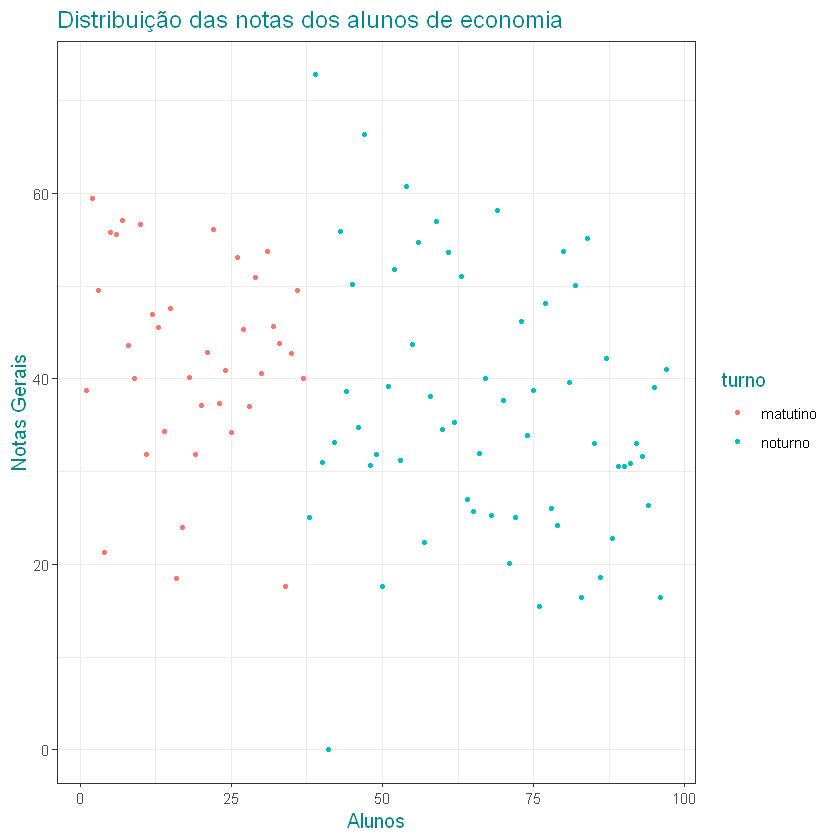

In [238]:
### 2. Gráfico
ggplot(data=df, aes(x=id, y=nota_geral))+
    geom_point(aes(color=turno), size=1)+
    ggtitle("Distribuição das notas dos alunos de economia")+
    labs(x="Alunos", y="Notas Gerais")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))


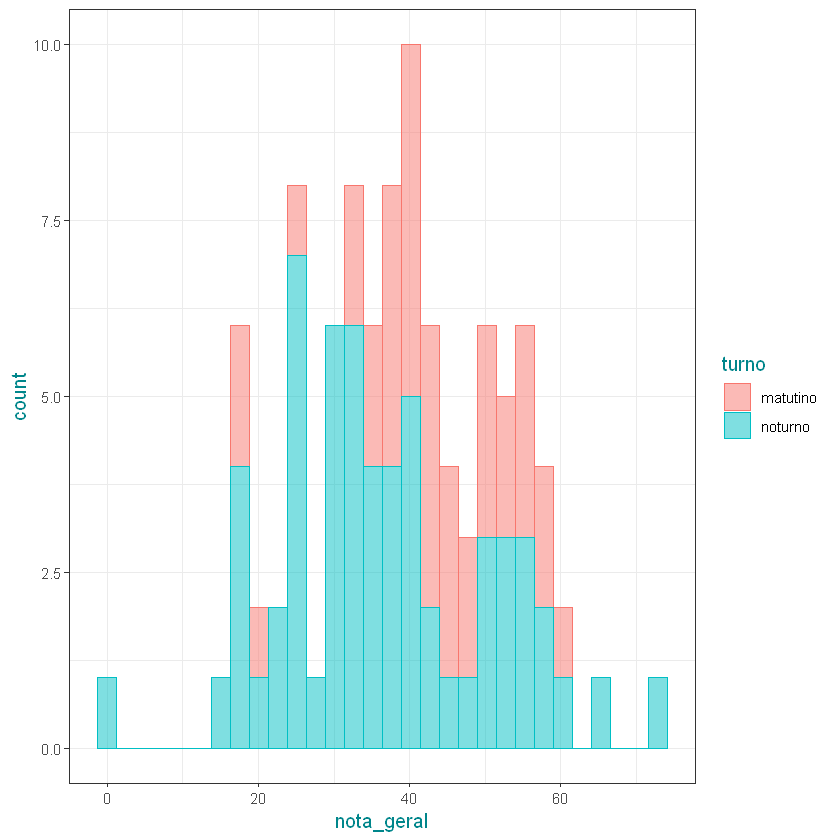

In [239]:
ggplot(df, aes(x=nota_geral, color=turno, fill=turno)) +
    geom_histogram(alpha=0.5, bins = 30)+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))

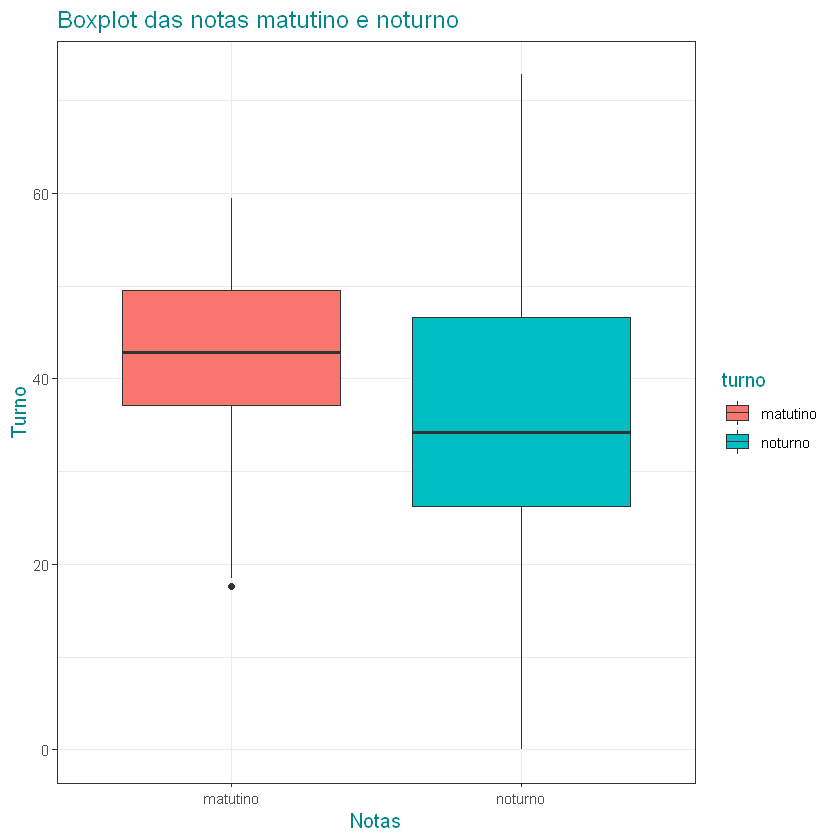

In [240]:
 ggplot(df, aes(x=turno, y=nota_geral, fill=turno)) +
    geom_boxplot() +
    ggtitle("Boxplot das notas matutino e noturno") +
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))+
    xlab("Notas")+
    ylab("Turno")


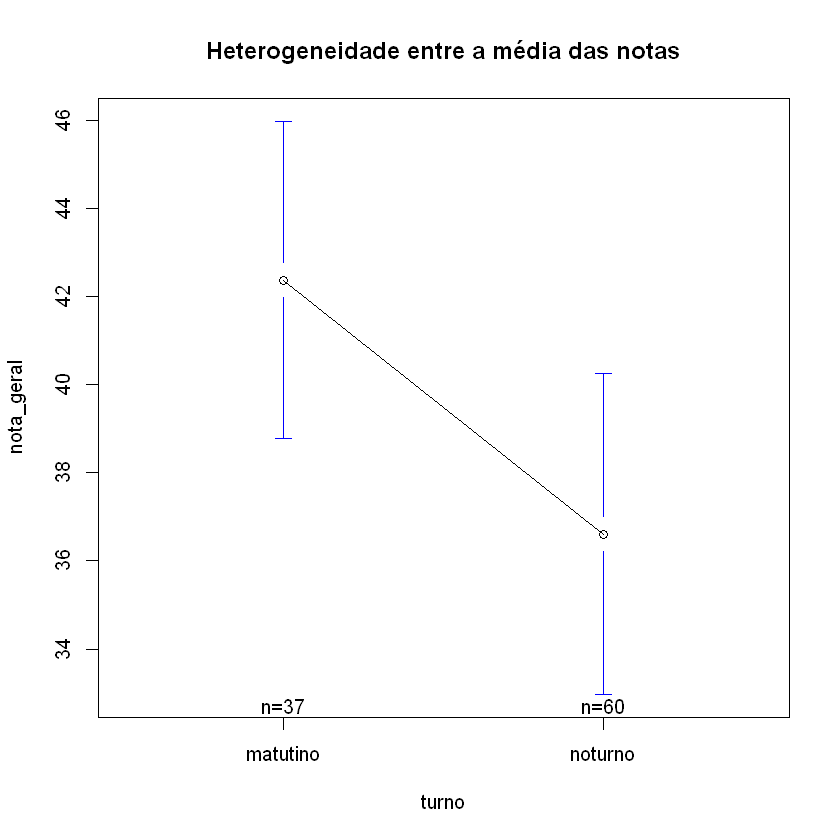

In [241]:
plotmeans(nota_geral~turno, data=df, main="Heterogeneidade entre a média das notas")

In [242]:
mod = lm(nota_geral~turno, data=df)

In [243]:
summary(mod)


Call:
lm(formula = nota_geral ~ turno, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-36.61  -8.07  -1.47   8.63  36.19 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    42.370      2.129  19.901   <2e-16 ***
turnonoturno   -5.762      2.707  -2.129   0.0359 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.95 on 95 degrees of freedom
Multiple R-squared:  0.04552,	Adjusted R-squared:  0.03547 
F-statistic: 4.531 on 1 and 95 DF,  p-value: 0.03588
